# Algoritmo Descenso de Gradiente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Generación de Datos de Ejemplo
En este paso generaremos un set de datos de ejemplo con un comportamiento lineal de acuerdo a los parámetros $b$ y $m$.

In [4]:
# y = b + m*x + err
def genera_datos_lineales(b, m, errp):
  X = np.random.uniform(0,10,25)
  y = np.array([])
  X_mean = np.sum(X) / len(X)
  for x in X:
    err = np.random.normal(1) * errp
    y = np.append(y, b + m*x + err)

  return X,y


In [6]:
# crearemos un set de datos totalmente ajustado con parametros 3 para el intercepto y 4 para la pendiente
b = 3
m = 4
errp = 0

X, y = genera_datos_lineales(b, m, errp)


## Set de Datos
Supongamos que existe un set de datos con features $X$ y etiquetas $y$, en donde $ y \in \mathbb{R}$.

In [9]:
X

array([0.40424094, 7.15826654, 2.01736829, 4.09484925, 5.47489896,
       8.04630368, 0.23389997, 8.6189969 , 4.22169064, 3.36369754,
       8.7191108 , 1.91336947, 9.04223597, 0.88703587, 8.59485668,
       9.58679907, 1.79709788, 9.84481226, 2.79350362, 3.3704003 ,
       1.50286006, 0.66443809, 7.45111272, 4.53468765, 0.62894822])

In [11]:
y

array([ 4.61696376, 31.63306618, 11.06947316, 19.37939702, 24.89959583,
       35.18521472,  3.93559987, 37.47598761, 19.88676257, 16.45479014,
       37.87644318, 10.65347786, 39.1689439 ,  6.54814349, 37.37942673,
       41.34719628, 10.1883915 , 42.37924904, 14.17401448, 16.48160122,
        9.01144024,  5.65775234, 32.80445086, 21.13875058,  5.51579289])

Text(0, 0.5, 'y')

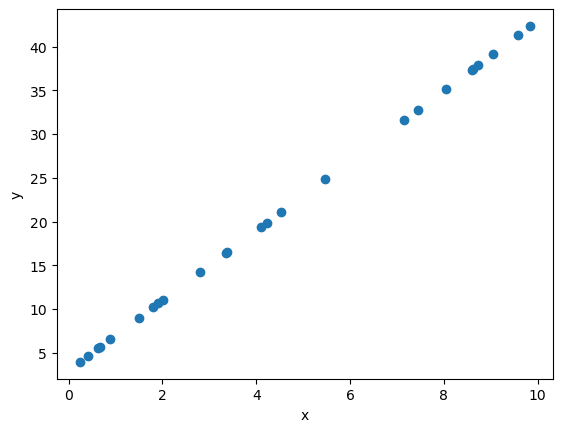

In [13]:
plt.scatter(x=X, y=y)
plt.xlabel('x')
plt.ylabel('y')

## Hipótesis

La formulación de la hipótesis será que hay una relación lineal entre $X$ e $y$. Por tanto:

$h_{\Theta}(x) = \Theta_{0} + \Theta_{1}x$

En donde, $\Theta_{0}$ corresponde al intercepto y $\Theta_{1}$ corresponde al coeficiente de $x$

Una tarea regresiva consiste en encontrar los valores de $\Theta_{0}$ y $\Theta_{0}$ a partir de los datos proporcionados. Pero, como ya sabemos, no eligiremos cualquier valor sino aquellos que produzcan el menor error cuadrático.

In [17]:
# Supongamos los siguientes valores arbitrarios para theta_0 y theta_1
theta_0 = 1
theta_1 = 1

In [19]:
# a continuación hacemos predicciones con el modelo
h_theta = theta_0 + theta_1*X
h_theta

array([ 1.40424094,  8.15826654,  3.01736829,  5.09484925,  6.47489896,
        9.04630368,  1.23389997,  9.6189969 ,  5.22169064,  4.36369754,
        9.7191108 ,  2.91336947, 10.04223597,  1.88703587,  9.59485668,
       10.58679907,  2.79709788, 10.84481226,  3.79350362,  4.3704003 ,
        2.50286006,  1.66443809,  8.45111272,  5.53468765,  1.62894822])

## Función de Costo

La función de costo (también llamada Función de Pérdida), el cual denotaremos por $J(Θ)$, es una medida de error que representa el nivel de inexactitud entre las etiquetas actuales $y$ y las etiquetas predichas $y_{pred}$. La función de costo, es elegida de forma que tenga un mínimo global único (es decir, una función convexa).

En el caso de una regresión lineal, una buena decisión es considerar, como función de costo, el error cuadrático medio (MSE).

Entonces,

$J(Θ) = \frac{1}{2m}\sum_{i=0}^{m}(y^{(i)} - y^{(i)}_{pred})^{2}$

$J(Θ) = \frac{1}{2m}\sum_{i=0}^{m}(y^{(i)} - h_{\Theta}(x^{i}))^{2}$

En donde, $m$ es el número de instancias del set de datos, $y^{(i)}$ es la etiqueta de la $i$-ésima instancia, y^{(i)}_{pred} es la etiqueta predicha para la $i$-ésima instancia del set de datos, y x^{i} corresponde al vector de features de la $i$-ésima instancia del set de datos.


In [22]:
mse = sum((y - h_theta)**2) / (2*len(y))
print(f'El MSE para theta_0={theta_0} y theta_1={theta_1} es {mse}')

El MSE para theta_0=1 y theta_1=1 es 173.04100727134474


In [24]:
# podemos probar con otros valores, acá hemos obtenido un mejor resultado
theta_0 = -2
theta_1 = 3
h_theta = theta_0 + theta_1*X
mse = sum((y - h_theta)**2) / (2*len(y))
print(f'El MSE para theta_0={theta_0} y theta_1={theta_1} es {mse}')

El MSE para theta_0=-2 y theta_1=3 es 51.431906466884186


In [26]:
# podemos seguir intentando, conseguimos mejorar nuevamente
theta_0 = -1
theta_1 = 2
h_theta = theta_0 + theta_1*X
mse = sum((y - h_theta)**2) / (2*len(y))
print(f'El MSE para theta_0={theta_0} y theta_1={theta_1} es {mse}')

El MSE para theta_0=-1 y theta_1=2 es 108.54419481196352


In [28]:
# podríamos seguir probando, pero la idea sería hacer un algoritmo que encuentre los valores
# de theta_0 y theta_1 que den el mínimo MSE

## Descenso de Gradiente
Para optimizar el MSE utilizaremos el descenso de gradiente. Este es un algoritmo optimizador que encuentra el mínimo de una función guiándose por el gradiente. ¿Cómo funciona este algoritmo? ahora lo veremos:

Primero, inicializaremos $\Theta_{0}$ y $\Theta_{1}$ con algún valor aleatorio.

Segundo, avanzaremos en dirección opuesta al gradiente del punto que acabamos de inicializar, en la función de costos. Recordemos que el gradiente es el vector de derivadas parciales.

$\nabla J(\Theta) = \frac{\partial }{\partial \Theta}J(\Theta) = (\frac{\partial J}{\partial \Theta_{0}}, \frac{\partial J}{\partial \Theta_{1}})$

Pero, ¿cómo es eso de avanzar?. Pues bien, vamos a desplazarnos del punto inicial hacia un nuevo punto dentro de la función de costo $J(\Theta)$, moviéndonos sólo una fracción $\alpha$ del gradiente. Por lo tanto, el algoritmo queda expresado de la siguiente forma:

repetir hasta(convergencia) {

$\Theta_{0}^{nuevo} := \Theta_{0} - \alpha ̇\cdot \frac{\partial J}{\partial \Theta_{0}}$

y,

$\Theta_{1}^{nuevo} := \Theta_{1} - \alpha ̇\cdot \frac{\partial J}{\partial \Theta_{1}}$

}

La constante $\alpha$ es llamada *learning rate* y controla cuán rápido el algoritmo desciende en dirección al mínimo.

Entonces, repetimos el segundo paso (calcular un nuevo punto) hasta converger al mínimo o bien hasta agotar una cantidad máxima de iteraciones.

Derivando las ecuaciones, llegamos a lo siguiente:


$\Theta_{0}^{nuevo} = \Theta_{0} - \alpha ̇\cdot \frac{1}{m} \sum_{i=0}^{m}(\Theta_{0} + \Theta_{1} \cdot x^{(i)} - y^{(i)})$

y,

$\Theta_{1}^{nuevo} = \Theta_{1} - \alpha ̇\cdot \frac{1}{m} \sum_{i=0}^{m}((\Theta_{0} + \Theta_{1} \cdot x^{(i)} - y^{(i)}) \cdot x^{(i)})$



In [31]:
# implementación en python

# calcula el valor predicho y
def h(theta, X):
  h = theta[0]  + theta[1] * X
  return h;

# definimos la funcion de costo en base al mse
def cost(theta, X, y):
  m = len(y)
  mse = 1 / (2*m) * sum((h(theta, X) - y)**2)
  return mse


def gradient_descent(theta, X, y, alpha=0.01):

  # nuevo theta, actualizado
  new_theta = [0,0]

  # cantidad de instancias
  m = len(y)

  new_theta[0] = theta[0] - alpha * 1/m * sum( h(theta, X) - y )
  new_theta[1] = theta[1] - alpha * 1/m * sum( (h(theta, X) - y) * X )

  return new_theta

In [34]:
# comprobando la funcion de costo
print(cost([1,4], X, y))
print(cost([0,0], X, y))
print(cost([-2,3], X, y))
print(cost([-1,2], X, y))

2.0
314.70439415523214
51.431906466884186
108.54419481196352


In [36]:
# inicializacion aleatoria de theta
theta = [0,0]

# learning rate
alpha = 0.01

# iteraciones
epochs = 10000

costs = []
for i in range(epochs):
  theta = gradient_descent(theta, X, y, alpha)
  loss = cost(theta, X, y)
  costs.append(loss)

print("Loss:", costs[-1], "Theta:", theta)

Loss: 1.126193605511621e-27 Theta: [2.999999999999918, 4.000000000000013]


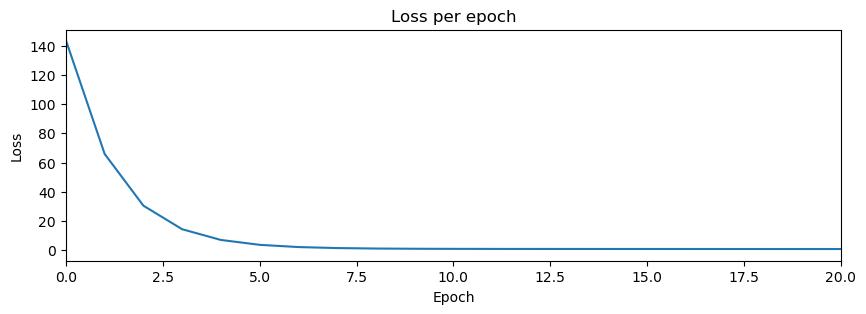

In [38]:
plt.figure(figsize=(10,3))
plt.title('Loss per epoch')
plt.plot(costs)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim([0,20])
plt.show()